<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/14_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [14]:
fmnist=tf.keras.datasets.fashion_mnist
(x_train,t_train),(x_test,t_test)=fmnist.load_data()

x_train,x_test=x_train/255,x_test/255

# t_train=tf.keras.utils.to_categorical(t_train,num_classes=10)
# t_test=tf.keras.utils.to_categorical(t_test,num_classes=10)

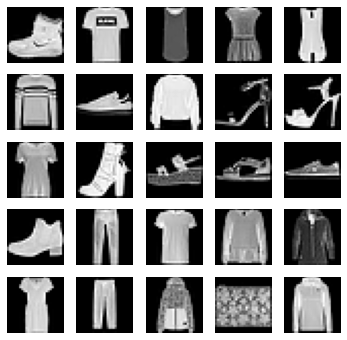

In [19]:
plt.figure(figsize=(6,6))

for index in range(25):
  plt.subplot(5,5,index+1)
  plt.imshow(x_train[index],cmap='gray')
  plt.axis('off')


plt.show()

In [22]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [23]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist=model.fit(x_train,t_train,epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5382 - accuracy: 0.8131 - val_loss: 0.5035 - val_accuracy: 0.8273
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4039 - accuracy: 0.8551 - val_loss: 0.3946 - val_accuracy: 0.8612
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3606 - accuracy: 0.8686 - val_loss: 0.3832 - val_accuracy: 0.8599
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8769 - val_loss: 0.3789 - val_accuracy: 0.8628
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8855 - val_loss: 0.3409 - val_accuracy: 0.8794
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.8903 - val_loss: 0.3584 - val_accuracy: 0.8734
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2822 - accuracy: 0.8961 - val_loss: 0.3425 - val_accuracy:

In [28]:
model.evaluate(x_test,t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.8787


[0.42461758852005005, 0.8787000179290771]

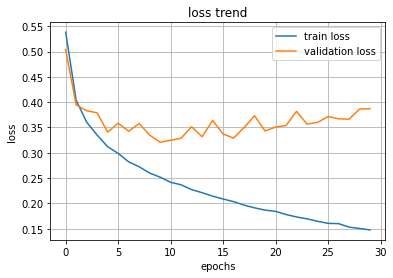

In [30]:
plt.title('loss trend')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')

plt.show()

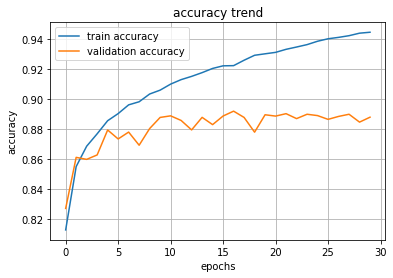

In [31]:
plt.title('accuracy trend')

plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')

plt.show()

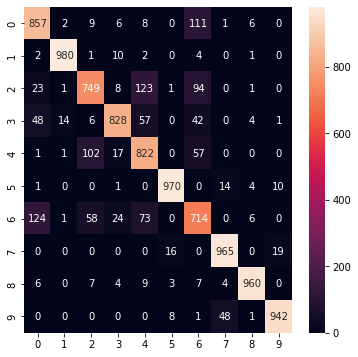

In [40]:
plt.figure(figsize=(6,6))

predict_value=model.predict(x_test)
cm=confusion_matrix(t_test,
                    np.argmax(predict_value,axis=-1))
sns.heatmap(cm,annot=True,fmt='d')
plt.show()